In [ ]:
https://www.kaggle.com/datasets/ashydv/advertising-dataset

In [2]:
# scikit-learn 설치 및 버전 확인
# pip install scikit-learn

import sklearn
sklearn.__version__

'1.7.0'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [8]:
import pandas as pd

# TODO: advertising.csv 파일을 읽어와서 5개의 레코드를 출력
# TODO 1
advertising = pd.read_csv('data/advertising.csv')
# TODO 2 - head, tail, sample(n)
advertising.head(3)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0


In [12]:
# TODO: 데이터프레임 정보 확인하기
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
# TODO: 통계정보 확인하기 - 평균, 최대, 최소, 표준편차 등
# 데이터의 분포가 제대로 이루어져있는 지를 확인할 수 있음
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
# TODO: 통계 정보 행과 열 바꾸기
# 보는 사람으로 하여금 데이터의 분포를 쉽게 이해할 수 있도록 행과 열을 바꾸는 것이 좋음
advertising.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [15]:
# TODO: 컬럼간의 상관계수 확인하기
# 상관계수: 각 변수간의 관계를 수치로 나타낸 것
advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


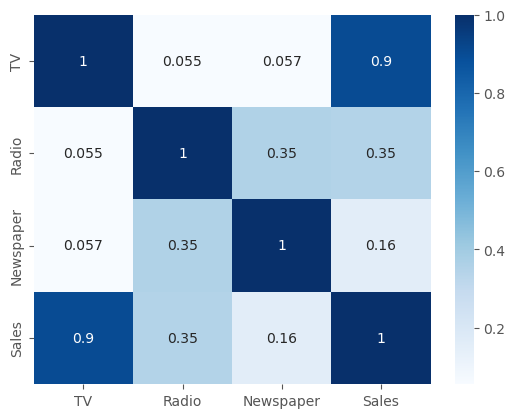

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = advertising.corr()
sns.heatmap(corrMatrix, annot=True, cmap='Blues')
plt.show()

In [23]:
# 히트맵을 기준으로 상관 관계가 높은 속성을 내림 차순으로 정렬하여 시각화

corr_sort = corrMatrix[['Sales']].sort_values(by='Sales', ascending= False)
corr_sort

,Sales
Sales,1.000000
TV,0.901208
Radio,0.349631
Newspaper,0.157960


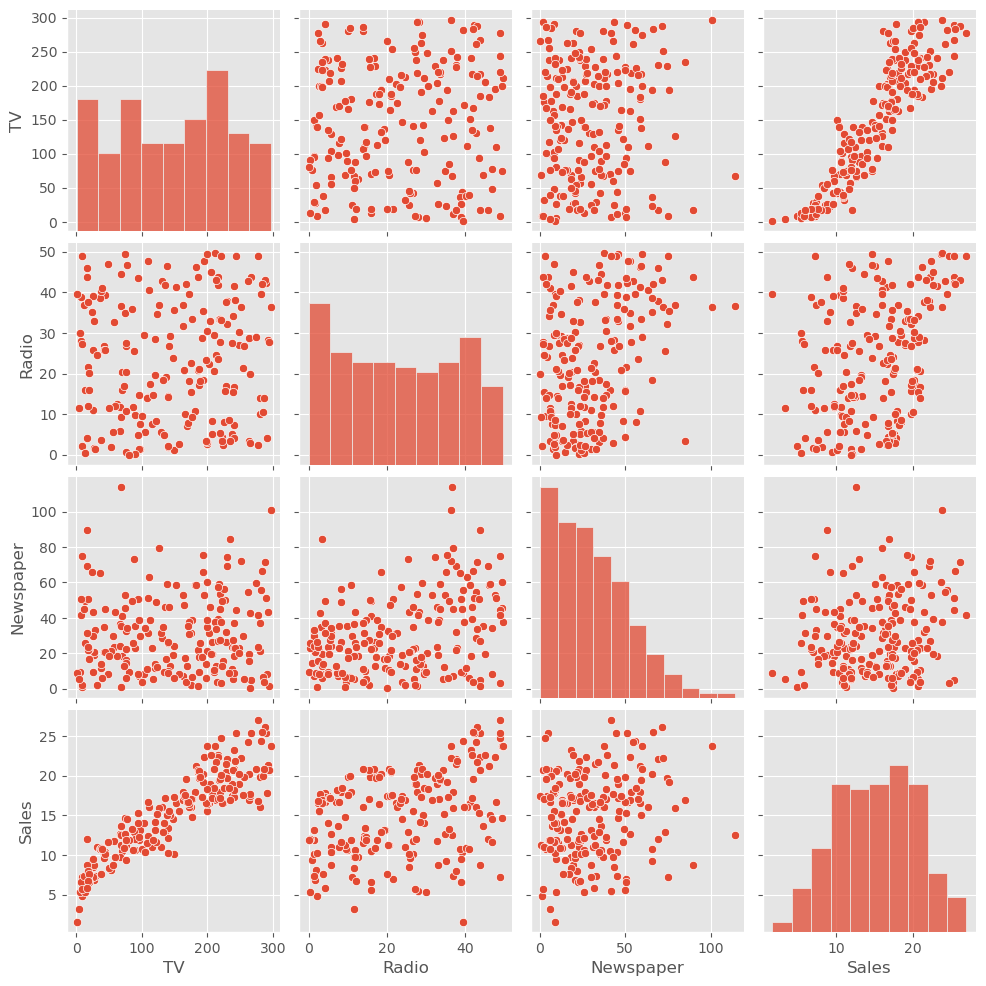

In [24]:
sns.pairplot(advertising)
plt.show()

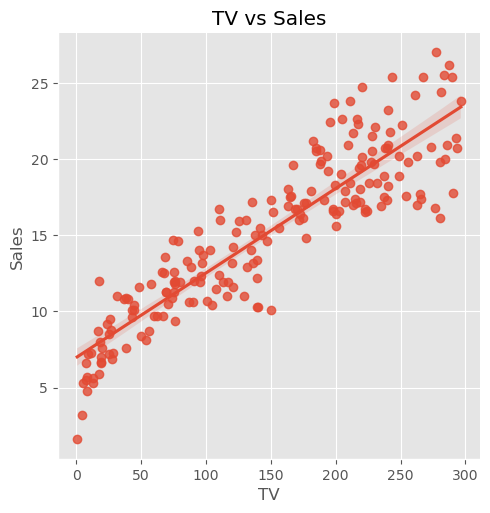

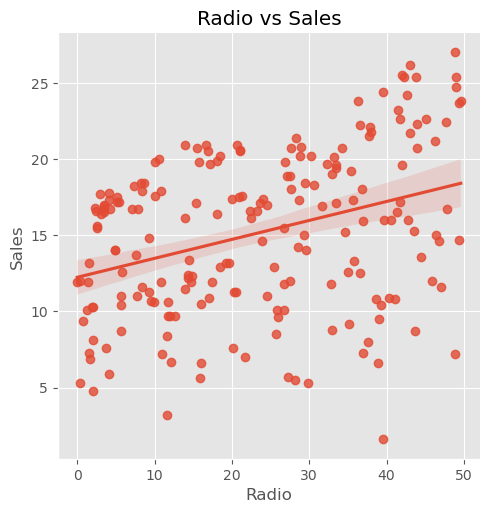

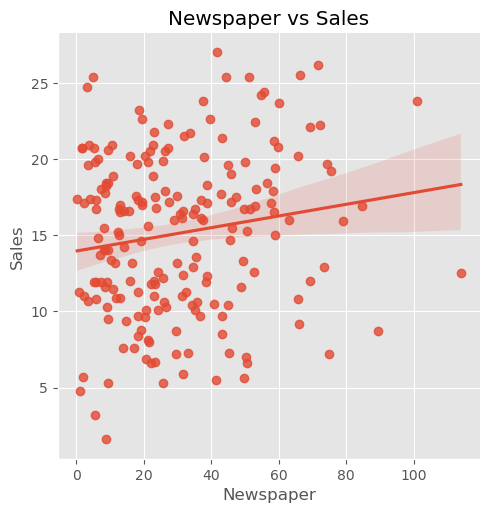

In [27]:
# 'TV', 'Radio', 'Newspaper'의 판매량 pairplot의 세개의 그래프만 그리면서 산점도와 함께 선형회귀선 포함하여 시각화하기

# TV vs Sales
sns.lmplot(x='TV', y='Sales', data=advertising, height=5)
plt.title("TV vs Sales")
plt.show()

# Radio vs Sales
sns.lmplot(x='Radio', y='Sales', data=advertising, height=5)
plt.title("Radio vs Sales")
plt.show()

# Newspaper vs Sales
sns.lmplot(x='Newspaper', y='Sales', data=advertising, height=5)
plt.title("Newspaper vs Sales")
plt.show()

## 단순 선형 회귀

In [29]:
# 단순 선형 회귀로 모델 학습하고 평가하기
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [39]:
#독립변수로 TV 컬럼만 가져온다. -> 데이터프레임
X_data1 = advertising[['TV']]

#종속변수로 Sales 데이터를 가져온다 -> 시리즈
y_data1 = advertising['Sales']

In [40]:
type(X_data1)

pandas.core.frame.DataFrame

In [41]:
# 훈련 데이터와 테스트 데이터를 7:3 비율로 나누기, random_state = 42
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_data1, y_data1, test_size=0.3, random_state=42)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)

(140, 1) (60, 1) (140,) (60,)


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model1 = LinearRegression() # 선형 회귀 모델 생성 
# 선형 회귀 모델 학습 
lr_model1.fit(X_train1, y_train1)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


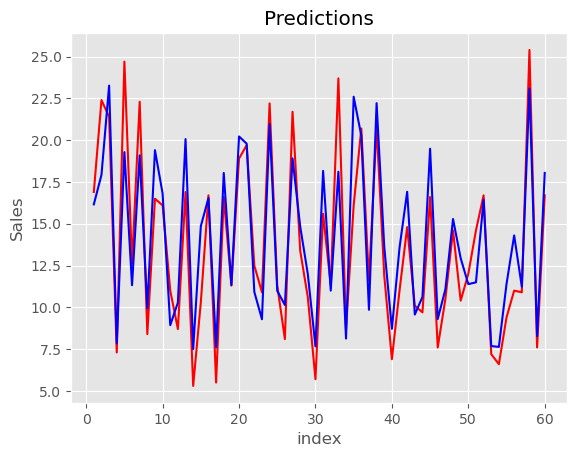

In [43]:
y_pred1 = lr_model1.predict(X_test1)

c = [i for i in range(1, 61, 1)]
plt.plot(c, y_test1, color = 'r') # 실젯값
plt.plot(c, y_pred1, color = 'b') # 예측값
plt.xlabel('index') # X축 이름
plt.ylabel('Sales') # Y축 이름
plt.title('Predictions') # 그래프 제목
plt.show()

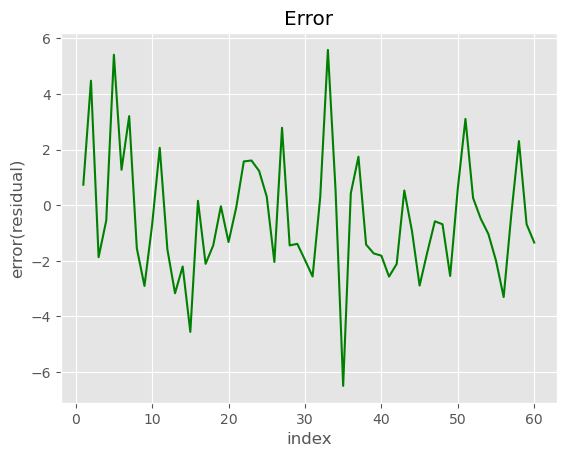

In [46]:
error = y_test1 - y_pred1 # 실젯값 - 예측값

plt.plot(c, error, color = 'g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [47]:
# 평가 지표 구하기

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(f'MSE: {mean_squared_error(y_test1, y_pred1):.2f}') # 평균 제곱 오차(MSE)
print(f'r2_score: {r2_score(y_test1, y_pred1):.2f}') # 결정계수(R2)

MSE: 5.18
r2_score: 0.81


In [ ]:
plt.scatter(X_scaled1, y_data1, color = 'red', label = 'scatter plot')
plt.plot(X_test1, y_pred1, color = 'blue', linewidth = 2, label = 'Regression Line')
plt.show()

In [51]:
# Slope Coefficients(기울기 계수)
w1 = lr_model1.coef_ # 기울기
print(f'slopes of TV: {w1[0]:.2f}')

# Intercept(절편)
b1 = lr_model1.intercept_ # y 절편
print('Intercept is:', b1.round(2))

slopes of TV: 0.05
Intercept is: 7.21


In [ ]:
# 새로운 TV광고비를 입력받아 값 예측하기

In [ ]:
tv = float(input("TV 광고비를 입력하세요:"))

predicted_sales = w1 * tv + b1

print(f"예상 판매량은 {float(predicted_sales):.2f} 입니다.")

# TV = 100
# (1) result = lr_model1.predict([[TV]])
# (2) w1 * TV + b1

예상 판매량은 8.85 입니다.


## 다중 선형 회귀

In [61]:
# 타겟과 속성 분리하기
X_data2 = advertising.drop(['Sales'], axis=1)
y_data2 = advertising['Sales']

X_data1 = advertising[['TV', 'Newspaper', 'Radio']]

In [62]:
X_data2

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


<Axes: >

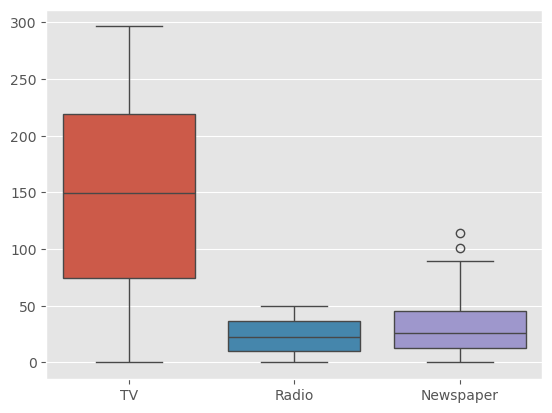

In [63]:
sns.boxplot(X_data2)

In [ ]:
# 훈련 데이터와 테스트 데이터를 7:3으로 나누기
# random_state 옵션을 사용하여 훈련 데이터와 테스트 데이터를 동일한 패턴으로 추출하기

In [64]:
from sklearn.model_selection import train_test_split

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_data2, y_data2, test_size=0.3, random_state=42)
print(X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape)

(140, 3) (60, 3) (140,) (60,)


In [ ]:
# 속성값의 차이가 있으므로 범위를 일정하게 맞춰 주는 표준화 적용하기

In [66]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train2)
X_test_scaled = scaler.transform(X_test2)

In [ ]:
# 모델 생성하고 학습시키기

In [67]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 생성
lr_model2 = LinearRegression()

# 선형 회귀 모델 학습
lr_model2.fit(X_train_scaled, y_train2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# 실제값과 예측값을 구해 데이터프레임 형태로 만들기

In [78]:
mlr = pd.DataFrame({'Actual_value': y_test2, 'Model prediction':lr_model2.predict(X_test_scaled)})
mlr.head()

,Actual_value,Model prediction
95,16.9,17.159919
15,22.4,20.533695
30,21.4,23.689144
158,7.3,9.519146
128,24.7,21.607368


In [ ]:
# 실제값과 예측값의 오차를 그래프로 표현

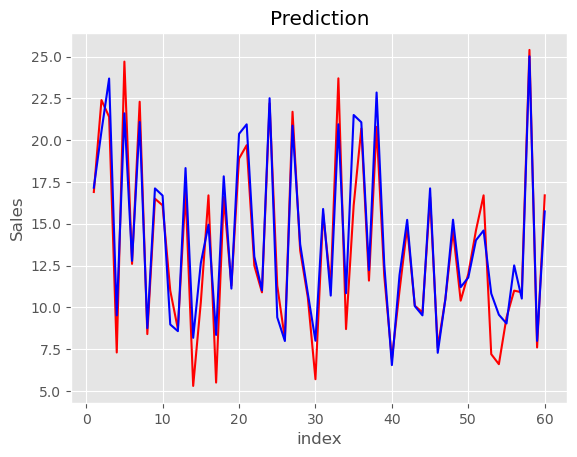

In [79]:
y_pred2 = lr_model2.predict(X_test_scaled)
c = [i for i in range(1, 61, 1)]

plt.plot(c, y_test2, color = 'r')
plt.plot(c, y_pred2, color ='b')
plt.xlabel('index')
plt.ylabel('Sales')
plt.title('Prediction')
plt.show()

In [ ]:
# 오차 그래프로 시각화하기

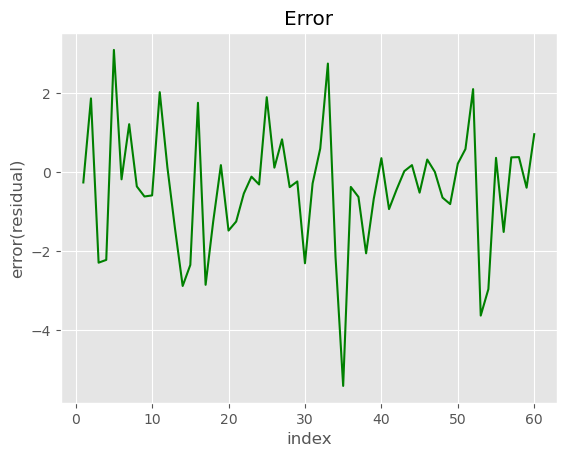

In [80]:
error2 = y_test2 - y_pred2
plt.plot(c, error2, color ='g')
plt.xlabel('index')
plt.ylabel('error(residual)')
plt.title('Error')
plt.show()

In [81]:
print(f'MSE:{mean_squared_error(y_test2, y_pred2):.2f}')
print(f'r2_score:{r2_score(y_test2, y_pred2):.2f}')

MSE:2.54
r2_score:0.91


In [84]:
# 기울기 계수
w2 = lr_model2.coef_
print(f'slopes of TV:{w2[0]:.2f}')
print(f'slopes of Radio:{w2[1]:.2f}')
print(f'slopes of Newspaper:{w2[2]:.2f}')

# 절편
b2 = lr_model1.intercept_
print('Intercept is:', b2.round(2))

slopes of TV:4.48
slopes of Radio:1.50
slopes of Newspaper:0.16
Intercept is: 7.21


In [88]:
# 새로운 값 예측하기 
new_data = [[175,15,2]]

new_data_scaled = scaler.transform(new_data)
lr_model2.predict(new_data_scaled)

array([15.67825254])

In [89]:
import os
# 1. 디렉토리 생성 (존재하지 않으면)
os.makedirs('model', exist_ok=True)

In [90]:
# 모델 저장
import joblib

joblib.dump(lr_model2, 'model/ad_lr_model.pkl')
joblib.dump(scaler, 'model/ad_scaler.pkl')

['model/ad_scaler.pkl']

In [92]:
# 모델 불러오기
loaded_model = joblib.load('model/ad_lr_model.pkl')

# 스케일러 불러오기
loaded_scaler = joblib.load('model/ad_scaler.pkl')

# 예측
new_data = [[175, 15, 2]]
new_data_scaled = loaded_scaler.transform(new_data)
loaded_model.predict(new_data_scaled)

array([15.67825254])

In [100]:
# 다항회귀 -> 차수를 올리는거임.
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train2)
X_test_poly = poly.transform(X_test2) 
#학습하면 안되니까 fit을 빼는거임. 이미 train2에서 학습한 형식으로 변환하는거니까.

In [101]:
from sklearn.preprocessing import StandardScaler
 
X_train_scaled_poly = scaler.fit_transform(X_train_poly)
X_test_scaled_poly = scaler.transform(X_test_poly)

In [102]:
from sklearn.linear_model import LinearRegression
lr_model3=LinearRegression()
lr_model3.fit(X_train_scaled_poly, y_train2)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [103]:
y_pred3 = lr_model3.predict(X_test_scaled_poly)

In [104]:
print(f'MSE:{mean_squared_error(y_test2, y_pred3):.2f}')
print(f'r2_score:{r2_score(y_test2, y_pred3):.2f}')

MSE:1.50
r2_score:0.95


In [106]:
# R2 결정계수: 모델이 데이터를 얼마나 잘 설명하는지를 나타냄
# MSE 평균 제곱 오차: 모델의 예측값과 실제값의 차이를 제곱하여 평균을 낸 값

# 단순
R2: 0.81
MSE: 5.18

# 다중
R2: 0.91
MSE: 2.54

# 다항
R2: 0.95
MSE: 1.50
